In [1]:
import pandas as pd


In [1]:
import matplotlib.pyplot as plt

import seaborn as sbn



In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # or Decision Tree Regressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
import pandas as pd


In [7]:
diabetesDataset = pd.read_csv('./diabetes.csv')

In [8]:
diabetesDataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
def eda(dataframe):
    print(f"""
    
    -- data types --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {diabetesDataset.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
    
    
    return dataframe.head()
eda(diabetesDataset)



    
    -- data types --
    
    Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
    
    -- NaN Values --
    
    Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
    
    -- Shape --
    
    (768, 9)
    
    -- Unique --
    
    Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age           

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetesDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
diabetesDataset.columns = diabetesDataset.columns.str.lower()

In [12]:
diabetesDataset.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [13]:
for col in diabetesDataset.columns:
    ZV = len(diabetesDataset[diabetesDataset[col] <= 0])
    print(f'Zero values in column {col} = {ZV}')

Zero values in column pregnancies = 111
Zero values in column glucose = 5
Zero values in column bloodpressure = 35
Zero values in column skinthickness = 227
Zero values in column insulin = 374
Zero values in column bmi = 11
Zero values in column diabetespedigreefunction = 0
Zero values in column age = 0
Zero values in column outcome = 500


In [14]:
cols_with_zero = ["glucose","bloodpressure","skinthickness","insulin","bmi"]
for cols in cols_with_zero:
    median = diabetesDataset[cols].median()
    diabetesDataset.loc[diabetesDataset[cols]<=0,cols] = median

In [15]:
for col in diabetesDataset.columns:
    ZV = len(diabetesDataset[diabetesDataset[col] <= 0])
    print(f'Zero values in column {col} = {ZV}')

Zero values in column pregnancies = 111
Zero values in column glucose = 0
Zero values in column bloodpressure = 0
Zero values in column skinthickness = 0
Zero values in column insulin = 0
Zero values in column bmi = 0
Zero values in column diabetespedigreefunction = 0
Zero values in column age = 0
Zero values in column outcome = 500


In [45]:
x = diabetesDataset.drop('outcome', axis = 1)
y = diabetesDataset['outcome']

In [46]:

x

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [47]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 1)

In [49]:
x_train


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
88,15,136,70,32,110.0,37.1,0.153,43
467,0,97,64,36,100.0,36.8,0.600,25
550,1,116,70,28,30.5,27.4,0.204,21
147,2,106,64,35,119.0,30.5,1.400,34
481,0,123,88,37,30.5,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440.0,39.4,0.134,30
715,7,187,50,33,392.0,33.9,0.826,34
72,13,126,90,23,30.5,43.4,0.583,42
235,4,171,72,23,30.5,43.6,0.479,26


In [50]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [51]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7532467532467533


In [52]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 129.50
|   |--- feature_5 <= 26.30
|   |   |--- feature_6 <= 0.67
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.67
|   |   |   |--- class: 0
|   |--- feature_5 >  26.30
|   |   |--- feature_7 <= 27.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  27.50
|   |   |   |--- class: 0
|--- feature_1 >  129.50
|   |--- feature_5 <= 27.85
|   |   |--- feature_1 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  145.50
|   |   |   |--- class: 0
|   |--- feature_5 >  27.85
|   |   |--- feature_1 <= 158.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  158.50
|   |   |   |--- class: 1



In [53]:
with open ('decision_tree.log', 'w') as fout:
    fout.write(text_representation)

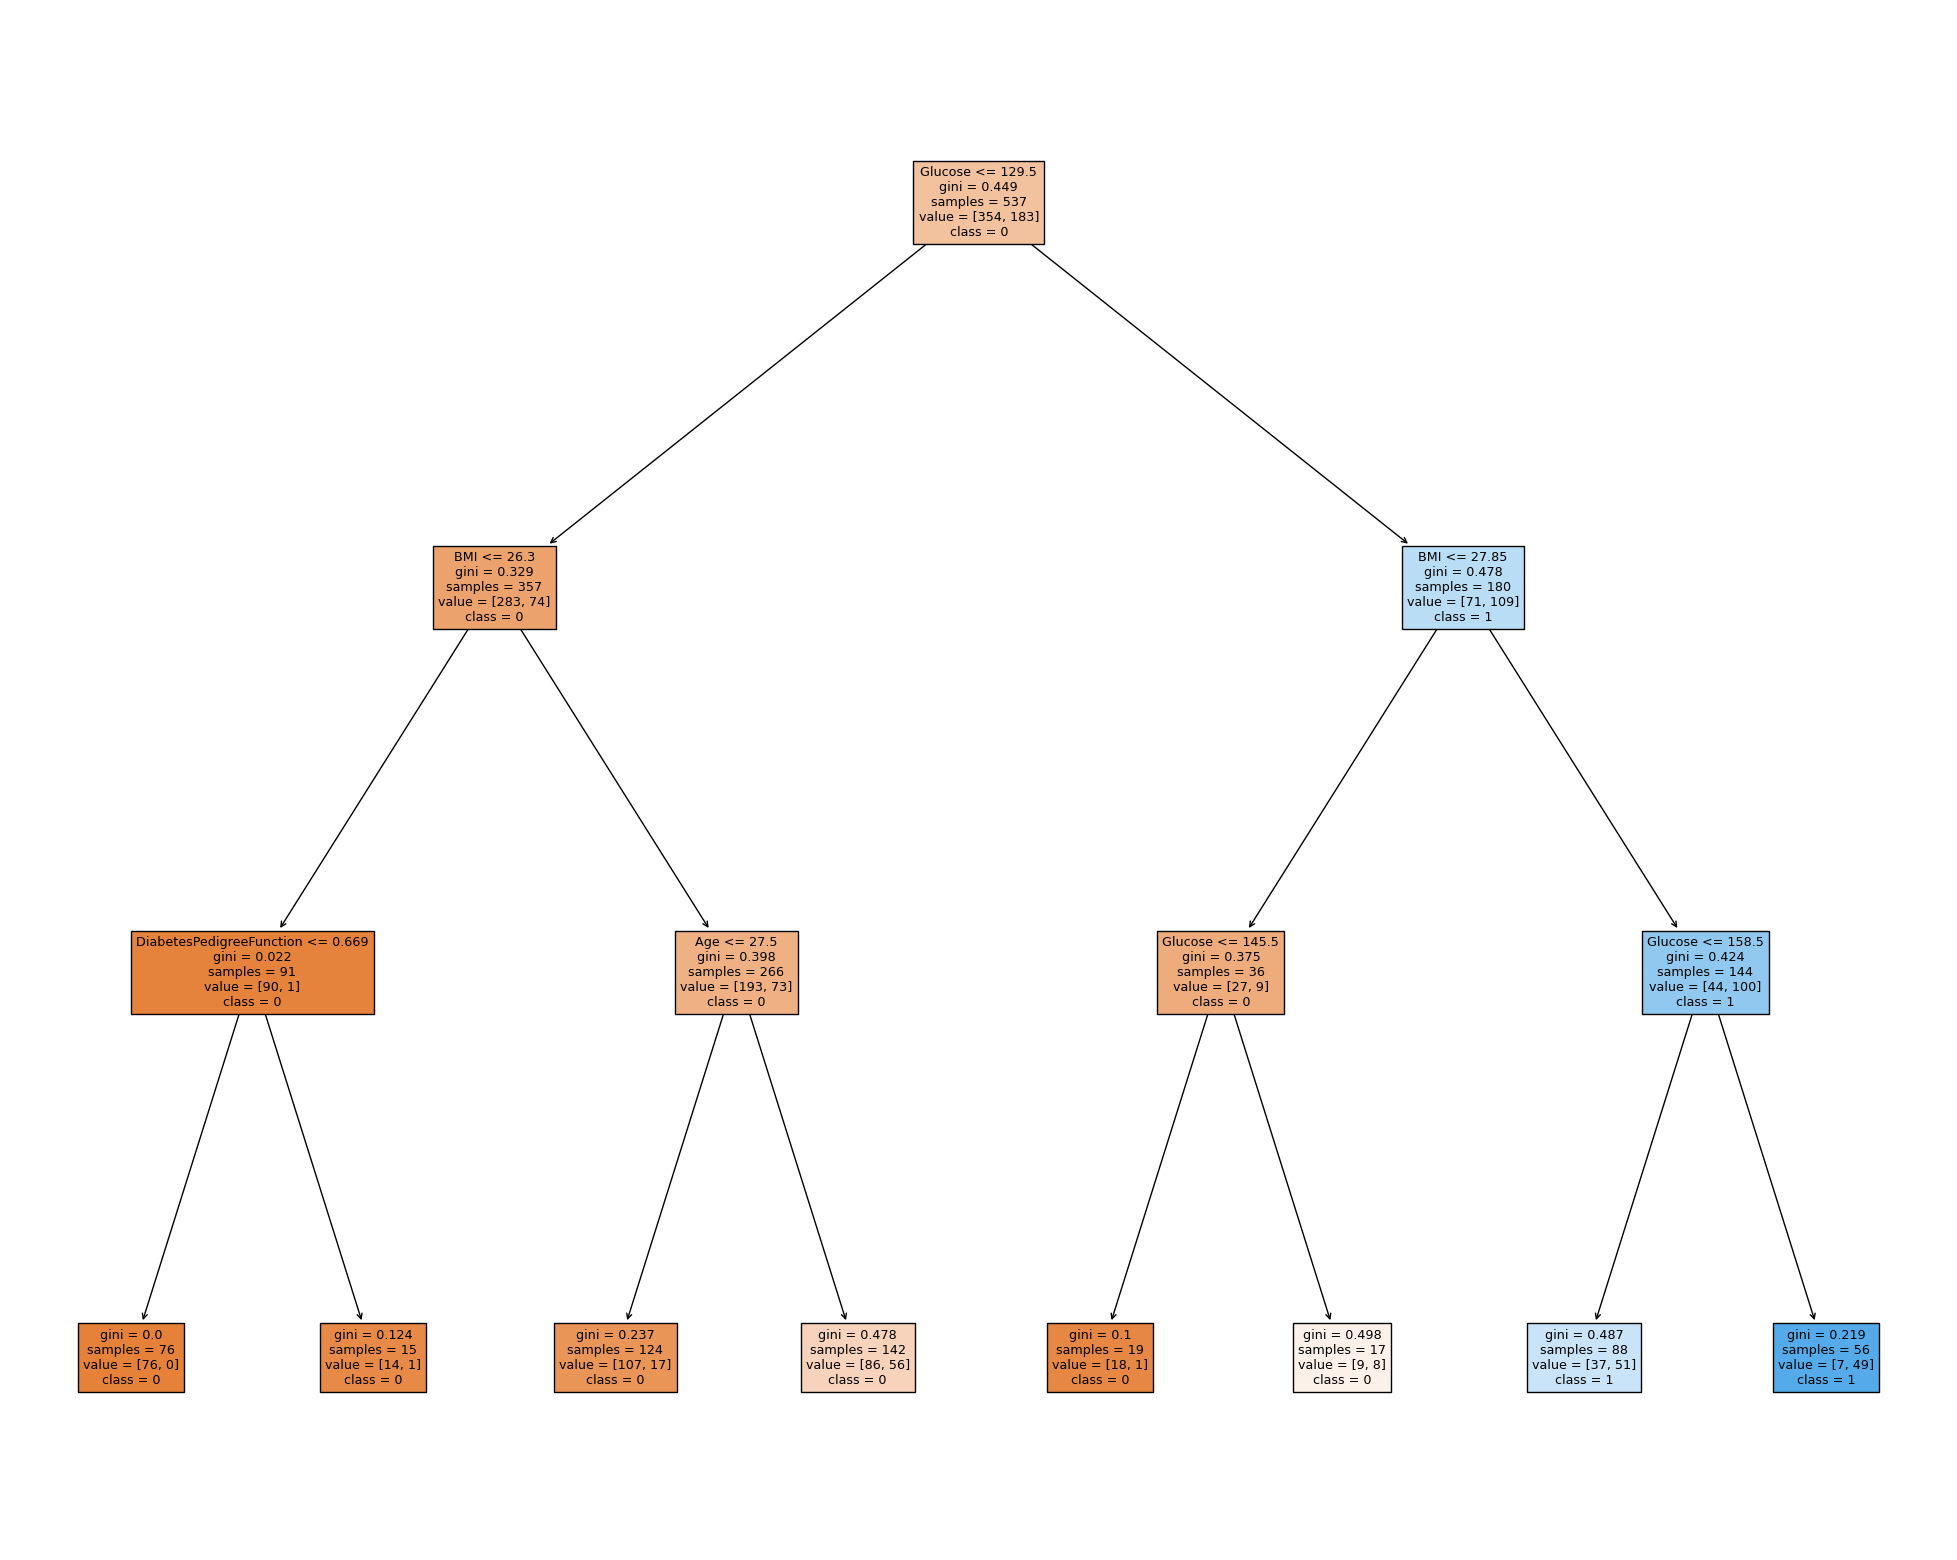

In [54]:
feature_names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig('tree1.png')

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 1)

In [56]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [57]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7662337662337663


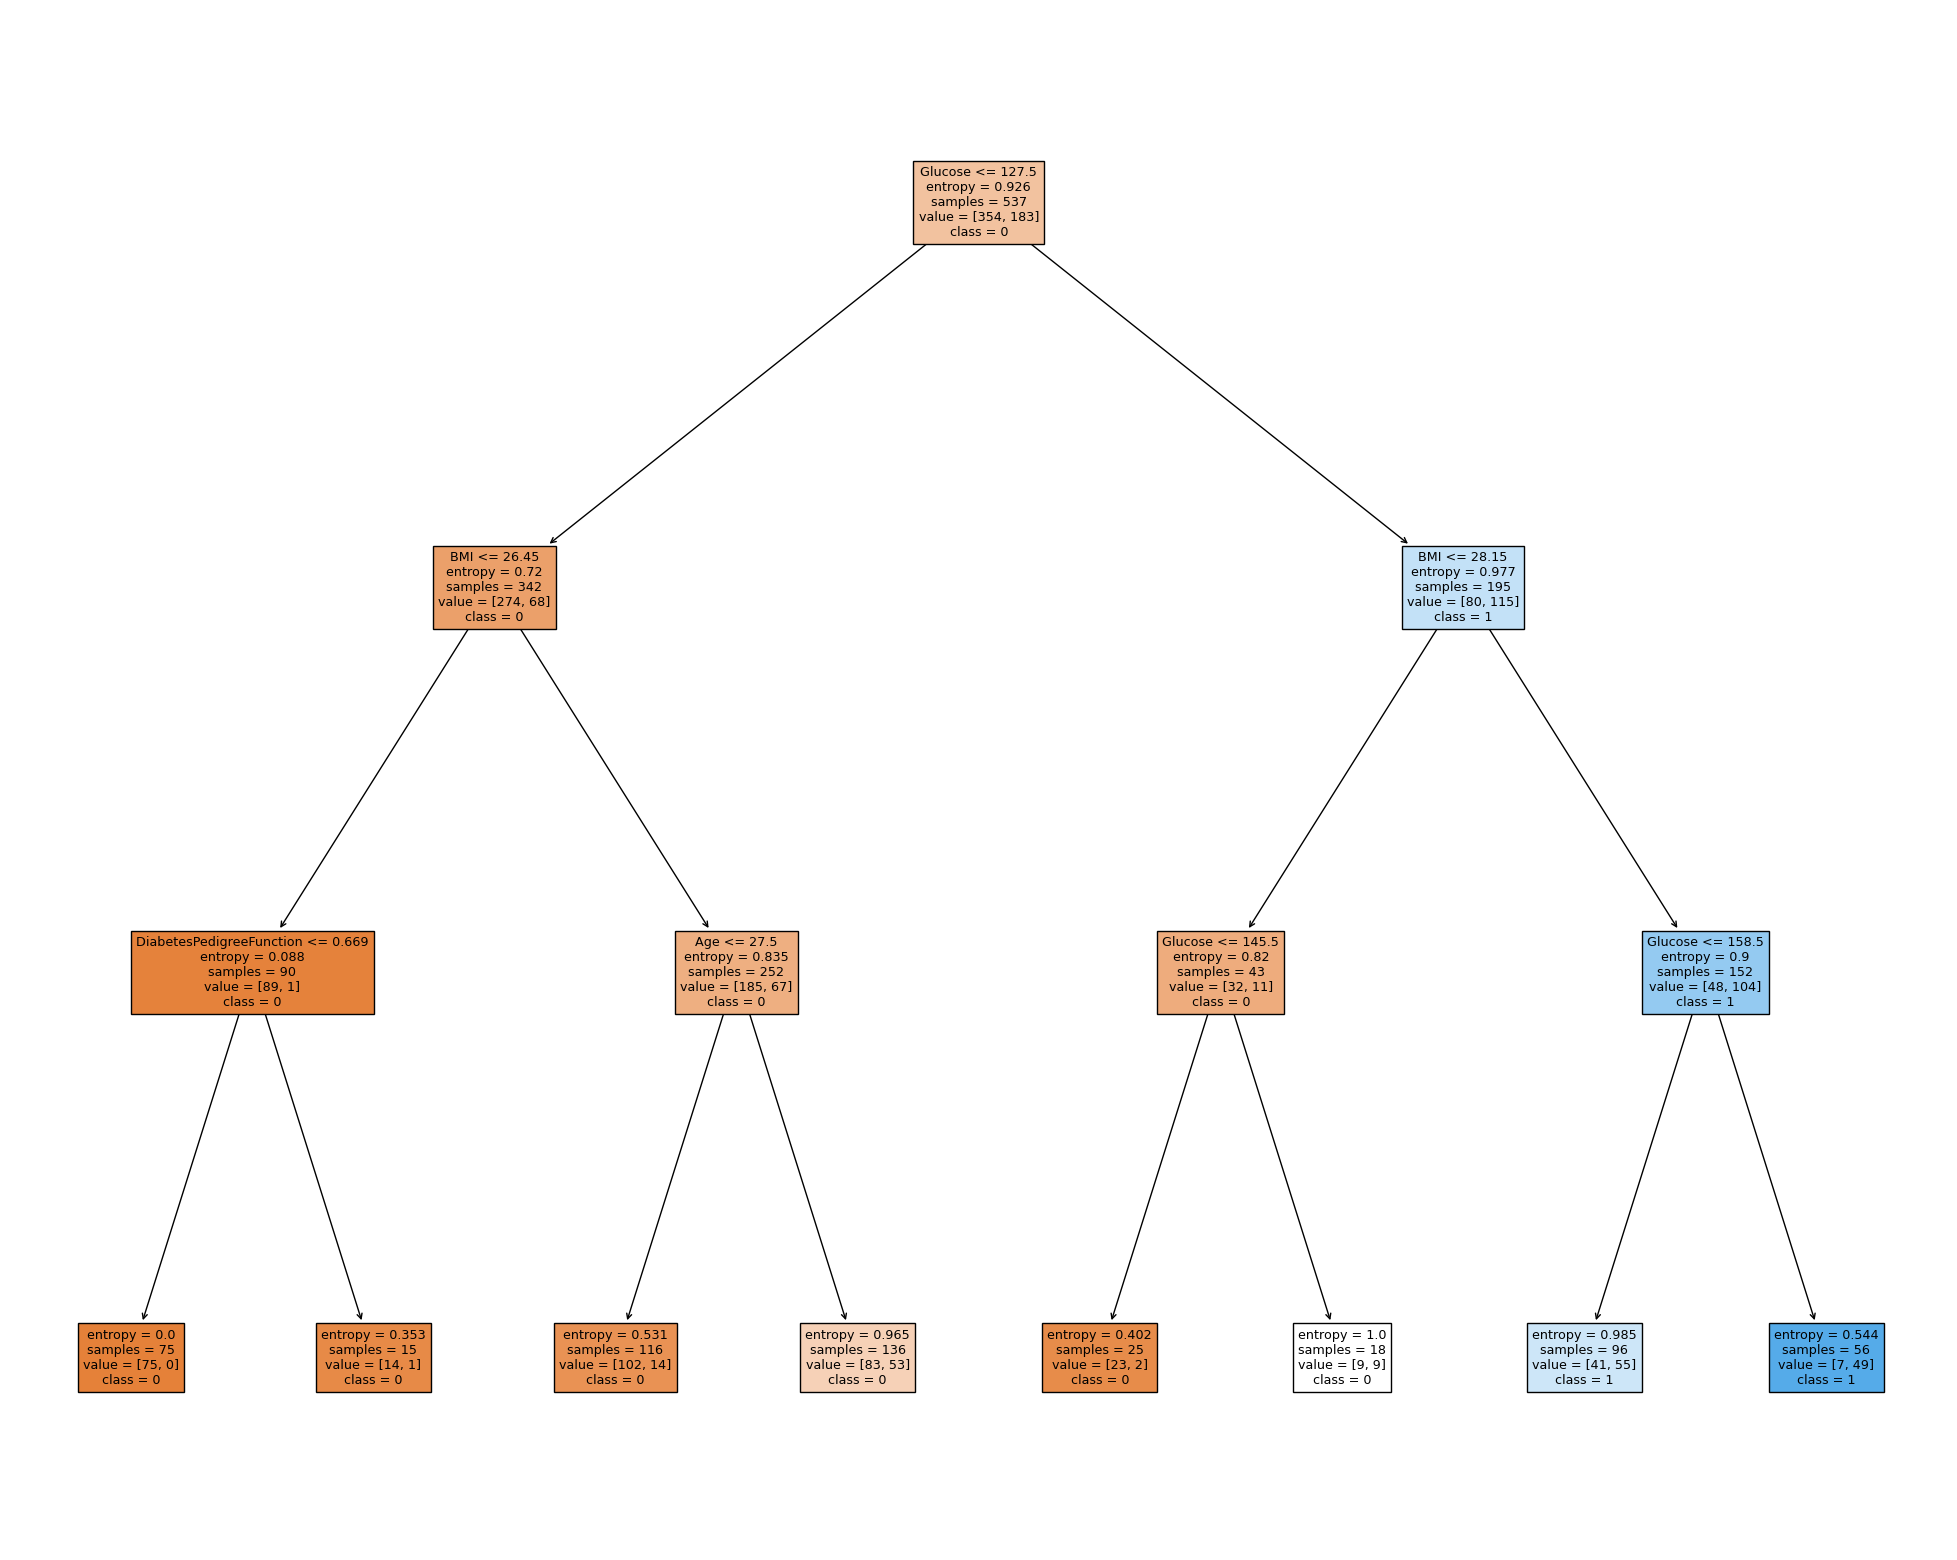

In [58]:
feature_names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig('tree2.png')


In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [62]:
confusion = confusion_matrix(y_test, y_pred)

In [63]:
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[123  23]
 [ 31  54]]
